In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/arinaaandreeva/Datasets/main/CO2_emission_2008_13.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/arinaaandreeva/Datasets/main/CO2_emission_2014.csv')
df = pd.concat([df1, df2], axis=0)
print(df1.shape, df2.shape, df.shape)

(1584, 13) (264, 13) (1848, 13)


##EDA

The target value is CO2 emission per capita. So the model will predict emission indicator based on indicators from different countries.

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,country,year,gdp_growth,co2_emission_metrics_per_capita,electricity_access,urban_population,population_growth,urban_population_growth_annual,live_stock_production,forest_area,renewable_energy_use,energy_use_kg_of_oil_per_capita,population_total
0,Afghanistan,2008,3.9,0.2,42.4,23.3,2.3,3.2,90.9,1.9,21.3,..,"2,77,22,276.00"
1,Albania,2008,7.5,1.5,..,50,-0.8,1.4,87.3,28.4,35.9,710.7,"29,47,314.00"
2,Algeria,2008,2.4,3.2,..,66.1,1.6,2.8,68.9,0.8,0.3,"1,073.20","3,47,30,608.00"
3,American Samoa,2008,-2.6,..,..,87.8,-1.5,-1.6,99.6,87.5,0,..,"57,492.00"
4,Andorra,2008,-5.6,6.4,100,89,1.4,1.1,..,34,17.4,..,"83,862.00"


In [ ]:
df.dtypes

country                            object
year                                int64
gdp_growth                         object
co2_emission_metrics_per_capita    object
electricity_access                 object
urban_population                   object
population_growth                  object
urban_population_growth_annual     object
live_stock_production              object
forest_area                        object
renewable_energy_use               object
energy_use_kg_of_oil_per_capita    object
population_total                   object
dtype: object

In [ ]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings = strings[1:len(strings)]
strings

['gdp_growth',
 'co2_emission_metrics_per_capita',
 'electricity_access',
 'urban_population',
 'population_growth',
 'urban_population_growth_annual',
 'live_stock_production',
 'forest_area',
 'renewable_energy_use',
 'energy_use_kg_of_oil_per_capita',
 'population_total']

In [ ]:
for i in strings:
  df[i]=df[i].apply(lambda x:x.replace('..',''))
  df[i]=df[i].apply(lambda x:x.replace(',',''))
  df[i]=df[i].apply(pd.to_numeric)

df['year']=df['year'].astype(object)

In [ ]:
df.dtypes

country                             object
year                                object
gdp_growth                         float64
co2_emission_metrics_per_capita    float64
electricity_access                 float64
urban_population                   float64
population_growth                  float64
urban_population_growth_annual     float64
live_stock_production              float64
forest_area                        float64
renewable_energy_use               float64
energy_use_kg_of_oil_per_capita    float64
population_total                   float64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

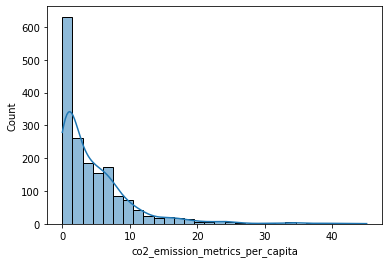

In [ ]:
sns.histplot(df.co2_emission_metrics_per_capita, bins=30, kde=True)

The majority of countries have pretty low levels of CO2 emission per capita. It is a long-tail distribution, because bars on the left side are much bigger. Actually, here we can make an assumption that the majority of countries with high level of emissions are densely populated, plus more developed countries have lower level of emossions so this causes such lind of distribution. 


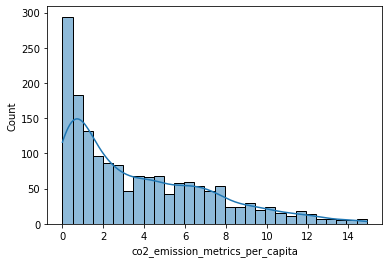

In [ ]:
sns.histplot(df.co2_emission_metrics_per_capita[df.co2_emission_metrics_per_capita < 15], bins=30, kde=True)

In [ ]:
emission_logs = np.log1p(df.co2_emission_metrics_per_capita)

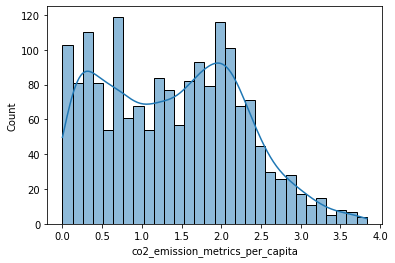

In [ ]:
sns.histplot(emission_logs, bins=30, kde=True)

In [ ]:
df.isnull().sum()

country                              0
year                                 0
gdp_growth                          98
co2_emission_metrics_per_capita     93
electricity_access                  38
urban_population                    24
population_growth                   10
urban_population_growth_annual      24
live_stock_production              116
forest_area                         40
renewable_energy_use                43
energy_use_kg_of_oil_per_capita    575
population_total                    10
dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
df.describe().astype(int)

,year,gdp_growth,co2_emission_metrics_per_capita,electricity_access,urban_population,population_growth,urban_population_growth_annual,live_stock_production,forest_area,renewable_energy_use,energy_use_kg_of_oil_per_capita,population_total
count,1848,1848,1848,1848,1848,1848,1848,1848,1848,1848,1848,1848
mean,2011,3,4,78,57,1,2,72,31,28,1700,280322207
std,2,5,5,30,23,1,1,41,23,28,2608,890573416
min,2008,-62,0,0,0,-4,-6,0,0,0,0,0
25%,2009,0,0,61,37,0,0,66,11,4,0,1326253
50%,2011,3,2,97,56,1,1,92,30,17,717,9459452
75%,2013,5,6,100,76,2,3,98,46,47,2226,51266147
max,2014,123,45,100,100,16,16,258,98,97,18178,7254226881


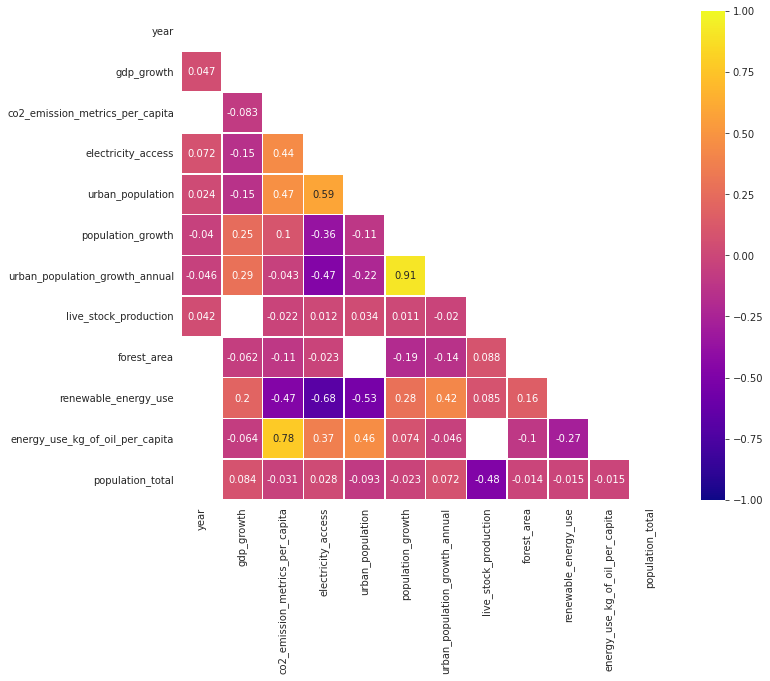

In [ ]:
corr = df.corr(method ='pearson')
corr = corr[np.abs(corr)>0.01] # Clear out so small values

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(figsize=(11, 9))
    ax = sns.heatmap(corr,annot=True, mask=mask, vmin=-1, vmax=1, square=True,linewidths=.5, cmap="plasma")

Correlation matrix shows that the most important indicators for predicting amount of emission are urban population growth, energy use of oil, renewable energy use and other. The majority of indicators have high correlation with emission of CO2.

##Regressions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
numerical = df[['gdp_growth', 'co2_emission_metrics_per_capita',
       'electricity_access', 'urban_population', 'population_growth',
       'urban_population_growth_annual', 'live_stock_production',
       'forest_area', 'renewable_energy_use',
       'energy_use_kg_of_oil_per_capita', 'population_total']]
categorical = df[['country', 'year']]

In [ ]:
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['country', 'year']])
print(transformed.toarray())

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
X = df[['country', 'year','gdp_growth',
       'electricity_access', 'urban_population', 'population_growth',
       'urban_population_growth_annual', 'live_stock_production',
       'forest_area', 'renewable_energy_use',
       'energy_use_kg_of_oil_per_capita', 'population_total']]
       
y = df['co2_emission_metrics_per_capita']

In [ ]:
df.columns

Index(['country', 'year', 'gdp_growth', 'co2_emission_metrics_per_capita',
       'electricity_access', 'urban_population', 'population_growth',
       'urban_population_growth_annual', 'live_stock_production',
       'forest_area', 'renewable_energy_use',
       'energy_use_kg_of_oil_per_capita', 'population_total'],
      dtype='object')

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(categorical)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
df = numerical

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [ ]:
len(df_train), len(df_val), len(df_test)

(1108, 370, 370)

In [ ]:
y_train = df_train.co2_emission_metrics_per_capita.values
y_val = df_val.co2_emission_metrics_per_capita.values
y_test = df_test.co2_emission_metrics_per_capita.values

del df_train['co2_emission_metrics_per_capita']
del df_val['co2_emission_metrics_per_capita']
del df_test['co2_emission_metrics_per_capita']

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

X_train = df_train.reset_index(drop=True)
X_train_dict = X_train.to_dict(orient='records')
X_train = dv.fit_transform(X_train_dict)

X_val = df_val.reset_index(drop=True)
X_val_dict = X_val.to_dict(orient='records')
X_val = dv.fit_transform(X_val_dict)

X_test = df_test.reset_index(drop=True)
X_test_dict = X_test.to_dict(orient='records')
X_test = dv.fit_transform(X_test_dict)

##Decision Tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeRegressor(max_depth = 2)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.656   RMSE: 3.383


In [ ]:
parameters = {'max_depth' : [2,5,10, 15],
              'min_samples_leaf' : [1, 5, 10, 15]           
              }
dt_v2 = GridSearchCV(dt, parameters, cv=10, n_jobs=-1)

dt_v2.fit(X_train, y_train)

print('Best results with Parameters', dt_v2.best_params_)

y_pred_ = dt_v2.best_estimator_.predict(X_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"Best r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

Best results with Parameters {'max_depth': 15, 'min_samples_leaf': 1}
Best r2 score: 0.656   RMSE: 3.383


##Random Forest Regression

In [ ]:
rndforest = RandomForestRegressor(random_state=155)
rndforest.fit(X_train, y_train)

y_pred = rndforest.predict(X_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.937   RMSE: 1.448


In [ ]:
parameters = {'max_depth' : [2,5,10, 15],
              'min_samples_leaf' : [0.5, 1, 5, 10]           
              }

rndforest_v2 = GridSearchCV(rndforest, parameters, cv=10, n_jobs=-1)


rndforest_v2.fit(X_train, y_train)

print('Best results with Parameters', rndforest_v2.best_params_)

y_pred_ = rndforest_v2.best_estimator_.predict(X_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"Best r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

Best results with Parameters {'max_depth': 15, 'min_samples_leaf': 1}
Best r2 score: 0.937   RMSE: 1.448


##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin = LinearRegression()
lin.fit(df_train, y_train)

y_pred = lin.predict(df_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.678   RMSE: 3.27


##Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import preprocessing
from sklearn import utils
logr = LogisticRegression(penalty='l2')
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)

In [ ]:
logr = LogisticRegression(penalty='l2')
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_train)
logr.fit(df_train, encoded)
y_pred = logr.predict(df_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")


r2 score: -27.95   RMSE: 31.025


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


##Laso, Ridge regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
las = Lasso()
las.fit(X_train, y_train)

y_pred = las.predict(X_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.651   RMSE: 3.405


In [ ]:
las_parameters = {'max_iter': [2500, 5000, 10000],
                'alpha': [0.5, 1, 1.5]                
                }

las_v2 = GridSearchCV(las, las_parameters, cv=10, n_jobs=-1)


las_v2.fit(X_train, y_train)

print('Best results with Parameters', las_v2.best_params_)

y_pred_ = las_v2.best_estimator_.predict(X_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"Best r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

Best results with Parameters {'alpha': 0.5, 'max_iter': 2500}
Best r2 score: 0.651   RMSE: 3.405


In [ ]:
rid = Ridge()
rid.fit(X_train, y_train)

y_pred = rid.predict(X_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.678   RMSE: 3.27


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.34862e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
rid_parameters = {'max_iter': [1000, 25000, 5000],
                'alpha': [1, 1.5, 2]
                }

rid_v2 = GridSearchCV(rid, rid_parameters, cv=10, n_jobs=-1)


rid_v2.fit(X_train, y_train)

print('Best results with Parameters',rid_v2.best_params_)

y_pred_ = rid_v2.best_estimator_.predict(X_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"Best r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

Best results with Parameters {'alpha': 2, 'max_iter': 1000}
Best r2 score: 0.678   RMSE: 3.27


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.35896e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


##XGB regression

In [ ]:
import xgboost as xg

In [ ]:
xgb_r = xg.XGBRegressor(n_estimators = 10, seed = 100)
 
xgb_r.fit(X_train, y_train)
 
pred = xgb_r.predict(X_test)
 
r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

[16:08:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score: 0.678   RMSE: 3.27


In [ ]:
xgb_r_parameters = {'n_estimators': [100, 200],
                'seed': [25, 50, 100, 150],
                'learning_rate': [0.01, 0.1, 0.5]               
                }

xgb_r_v2 = GridSearchCV(xgb_r, xgb_r_parameters, cv=10, n_jobs=-1)


xgb_r_v2.fit(X_train, y_train)

print('Best results with Parameters', xgb_r_v2.best_params_)

y_pred = xgb_r_v2.best_estimator_.predict(X_val)

r2 = r2_score(y_val, y_pred)
rmse= MSE(y_val,y_pred, squared=False)
print(f"Best r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

[16:08:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best results with Parameters {'learning_rate': 0.5, 'n_estimators': 200, 'seed': 25}
Best r2 score: 0.934   RMSE: 1.486


##Selecting the final model
We gor the best R2_score and RMSE with XGBRegressor and Random Forest Regressor so it is the modelt that is the pest at predicting CO2 emission per capita.



In [ ]:
y_full_train = df_full_train['co2_emission_metrics_per_capita'].astype(int)
del df_full_train['co2_emission_metrics_per_capita']

In [ ]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [ ]:
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
rndforest = RandomForestRegressor(random_state=155, max_depth=15, min_samples_leaf=1)
rndforest.fit(X_train, y_train)
y_pred = rndforest.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse= MSE(y_test,pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

r2 score: 0.895   RMSE: 3.701


In [ ]:
xgb_r = xg.XGBRegressor(learning_rate = 0.5, n_estimators = 200, seed = 25)
 
xgb_r.fit(X_train, y_train)
 
pred = xgb_r.predict(X_test)
 
r2 = r2_score(y_test, y_pred)
rmse= MSE(y_test, pred, squared=False)
print(f"r2 score: {r2.round(3)}   RMSE: {rmse.round(3)}")

[16:08:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2 score: 0.895   RMSE: 1.788
